In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix

In [2]:
df = pd.read_csv('dementia_dataset (374 records, needs cleaning).csv')

#### Data preprocessing

In [3]:
# Import the necessary module
from ydata_profiling import ProfileReport

# Create a ProfileReport object
report = ProfileReport(df)

# Generate the data profiling report
report.to_file('data_profiling_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# remove column hand
df = df.drop(columns=['Hand'])

In [5]:
# percentage of null in SES
df['SES'].isnull().sum()/len(df['SES']) * 100

5.093833780160858

In [6]:
# impute the null values in SES with the mean
df['SES'] = df['SES'].fillna(df['SES'].mean())

In [7]:
# drop the null values in MMSE
df = df.dropna(subset=['MMSE'])

In [8]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
df = df.drop(columns=['Subject ID', 'MRI ID'])

In [10]:
df.shape

(371, 12)

In [11]:
# encode M/F column to 0/1
df['M/F'] = df['M/F'].replace({'M': 0, 'F': 1})

In [12]:
df['Group'] = df['Group'].replace({'Converted': 0, 'Demented': 1, 'Nondemented': 2})

In [13]:
# check all the columns in df and convert all the int columns to float
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     371 non-null    float64
 1   Visit     371 non-null    float64
 2   MR Delay  371 non-null    float64
 3   M/F       371 non-null    float64
 4   Age       371 non-null    float64
 5   EDUC      371 non-null    float64
 6   SES       371 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       371 non-null    float64
 9   eTIV      371 non-null    float64
 10  nWBV      371 non-null    float64
 11  ASF       371 non-null    float64
dtypes: float64(12)
memory usage: 37.7 KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     371 non-null    float64
 1   Visit     371 non-null    float64
 2   MR Delay  371 non-null    float64
 3   M/F       371 non-null    float64
 4   Age       371 non-null    float64
 5   EDUC      371 non-null    float64
 6   SES       371 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       371 non-null    float64
 9   eTIV      371 non-null    float64
 10  nWBV      371 non-null    float64
 11  ASF       371 non-null    float64
dtypes: float64(12)
memory usage: 37.7 KB


In [16]:
# split into x and y where y is 'Group' 
x = df.drop(columns=['Group'])
y = df['Group']

#### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1, stratify=y)

#### Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_subset = x_train.iloc[:, 2:]
x_train_scaled = scaler.fit_transform(x_train_subset)
x_train.iloc[:, 2:] = x_train_scaled

x_test_subset = x_test.iloc[:, 2:]
x_test_scaled = scaler.transform(x_test_subset)
x_test.iloc[:, 2:] = x_test_scaled


In [19]:
# print all variables
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Visit  MR Delay       M/F       Age      EDUC       SES      MMSE  \
173    3.0    1435.0  0.903300 -0.526994 -0.880272  1.346597 -3.007930   
209    1.0       0.0  0.903300  0.001786 -1.225385  1.346597  0.482575   
245    1.0       0.0  0.903300 -1.320165 -0.190046  1.346597  0.751075   
138    3.0    1282.0  0.903300  0.662762 -2.260725  2.252461 -2.470929   
196    1.0       0.0  0.903300 -2.113336  0.500181 -1.370993  0.751075   
..     ...       ...       ...       ...       ...       ...       ...   
336    2.0     493.0 -1.107052  0.001786  0.500181  0.440734  0.751075   
6      2.0     538.0  0.903300  1.720323  1.190408  0.440734 -0.054426   
369    3.0    2297.0 -1.107052  1.191543  0.500181 -1.370993 -0.322926   
34     3.0     489.0  0.903300  1.455933 -0.190046 -1.370993  0.482575   
260    3.0    1192.0  0.903300  0.001786 -0.880272  0.440734  0.482575   

          CDR      eTIV      nWBV       ASF  
173  1.857568 -0.076297 -0.872577 -0.036131  
209 -0.766967  0.51

#### Model Training

##### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.91
Confusion Matrix:
[[ 3  1  4]
 [ 2 27  0]
 [ 0  0 38]]


C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Confusion Matrix:
[[ 3  2  3]
 [ 4 24  1]
 [ 2  0 36]]


##### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.88
Confusion Matrix:
[[ 1  3  4]
 [ 2 27  0]
 [ 0  0 38]]


##### SVM - linear kernel

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.91
Confusion Matrix:
[[ 2  2  4]
 [ 1 28  0]
 [ 0  0 38]]


##### SVM - rbf kernel

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.91
Confusion Matrix:
[[ 2  2  4]
 [ 1 28  0]
 [ 0  0 38]]


##### K - NearestNeighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.59
Confusion Matrix:
[[ 0  0  8]
 [ 4 15 10]
 [ 3  6 29]]


##### XGboost

In [26]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.89
Confusion Matrix:
[[ 2  3  3]
 [ 2 27  0]
 [ 0  0 38]]


#### K-Fold

In [27]:
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Replace 'model' with your chosen model (e.g., logistic_regression, svm_classifier, random_forest)
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.95       0.88135593 0.83050847 0.91525424 0.94915254]
Mean accuracy: 0.9052542372881357


In [28]:
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold cross-validation object
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Replace 'model' with your chosen model (e.g., logistic_regression, svm_classifier, random_forest)
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.95348837 0.8372093  0.88095238 0.80952381 0.9047619  0.95238095
 0.92857143]
Mean accuracy: 0.8952697358012973


In [29]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model with regularization
logistic_regression_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0)

# Fit the models to your data
logistic_regression_l1.fit(x_train, y_train)
logistic_regression_l2.fit(x_train, y_train)

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# print accuracy
print("L1 accuracy:", logistic_regression_l1.score(x_test, y_test))
print("L2 accuracy:", logistic_regression_l2.score(x_test, y_test))

L1 accuracy: 0.9066666666666666
L2 accuracy: 0.9066666666666666


##### Validation and learning curves:

Progress (C=10): 100%|██████████| 5/5 [10:50<00:00, 130.17s/it]  


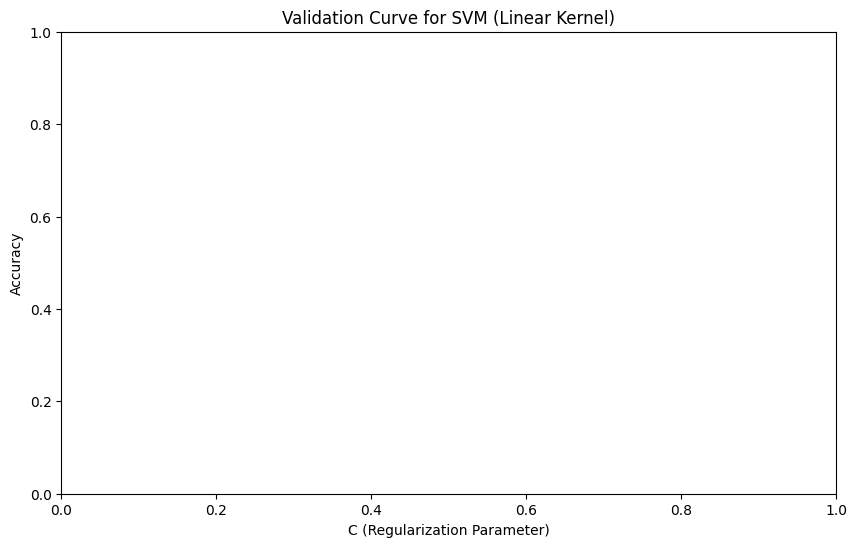

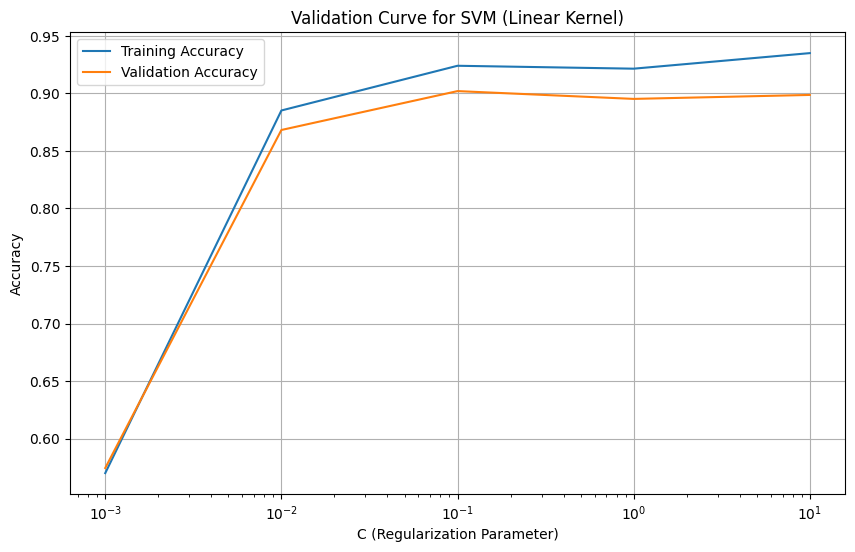

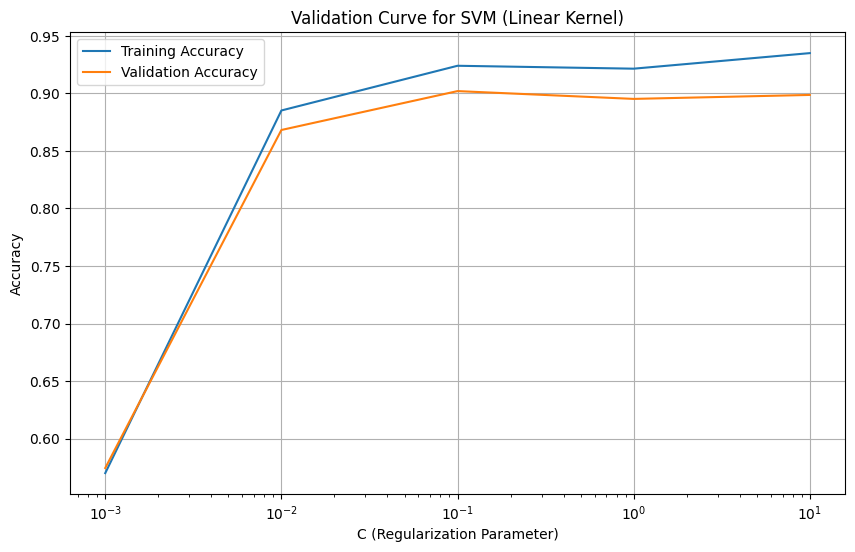

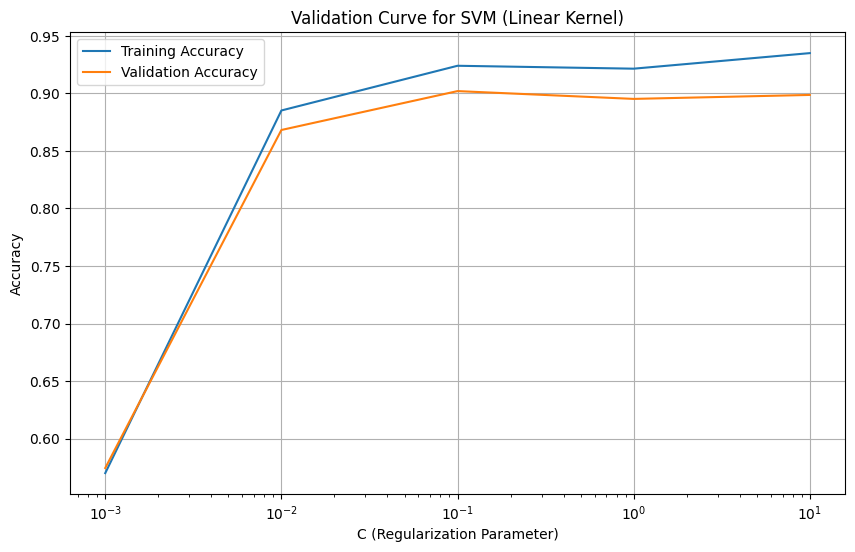

In [38]:
from sklearn.model_selection import validation_curve
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Define hyperparameter values to be tested
param_range = [0.001, 0.01, 0.1, 1, 10]

# Validation Curve for SVM
train_scores = []
test_scores = []

# Create a tqdm progress bar
param_range_iterator = tqdm(param_range, desc="Progress")

for param in param_range_iterator:
    # Update the progress bar description
    param_range_iterator.set_description(f"Progress (C={param})")

    # Compute validation scores for the current parameter value
    train, test = validation_curve(
        SVC(kernel='linear'), x_train, y_train, param_name="C", param_range=[param], cv=5, scoring="accuracy"
    )

    train_scores.append(np.mean(train))
    test_scores.append(np.mean(test))

# Plot Validation Curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for SVM (Linear Kernel)")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.semilogx(param_range, train_scores, label="Training Accuracy")
plt.semilogx(param_range, test_scores, label="Validation Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [1]:
import pandas as pd
df = pd.read_csv("oasis_Kaggle_longitudinal.csv")

In [2]:
# Import the necessary module
from ydata_profiling import ProfileReport

# Create a ProfileReport object
report = ProfileReport(df)

# Generate the data profiling report
report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]